In [1]:
import open3d as o3d
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import os

from f_extract_buried_points import extract_buried_points
from f_extract_surface_patch import *
from f_visualize_pointcloud import visualize_pointcloud
from f_create_ang_rad_bins import create_ang_rad_bins
from f_useful_functions import *
from f_compare_patches import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Import the data generated by MaSIF-site

In [2]:
os.chdir('c:\\Users\\david\\MT_code\\masif_site_outputs')

In [3]:
# Import the coordinates and the features that have been generated by dMaSIF-site of the following proteins
#   - Subunit A (IgG Fc)
#   - Subunit C (GB1 protein)
#   - Complex (Subunit A and C combined)

coords_A = np.load("1fcc_A_predcoords.npy")
features_A = np.load("1fcc_A_predfeatures_emb1.npy")
features_A = features_A[:, 16:32]

coords_C = np.load("1fcc_C_predcoords.npy")
features_C = np.load("1fcc_C_predfeatures_emb1.npy")
features_C = features_C[:, 16:32]

coords_complex = np.load("1fcc_A, C_predcoords.npy")
features_complex = np.load("1fcc_A, C_predfeatures_emb1.npy")

In [4]:
# Normalize features
features_A = normalize_columns_01(features_A)
features_C = normalize_columns_01(features_C)

### Compute Buried Surface of Both Proteins

In [5]:
#buried_A, buried_A_center = extract_buried_points(coords_A, coords_complex, 2)
#buried_C, buried_C_center = extract_buried_points(coords_C, coords_complex, 2)
#print(buried_A_center, buried_C_center)

os.chdir('c:\\Users\\david\\MT_code\\extracted_patches')
#np.save("buried_A_coords.npy", buried_A)
#np.save("buried_C_coords.npy", buried_C)

### Select Center for Patch Extraction

In [6]:
center_A = 4419 #buried_A_center
center_C = random.randint(0, len(coords_C))
print(center_A, center_C)

4419 6976


In [7]:
blue = [0, 0.5, 1]
red = [1, 0, 0]
green = [0, 1, 0]

colors_A = np.zeros_like(coords_A)
colors_A[:] = blue
#colors_A[buried_A] = red
colors_A[center_A] = green

#visualize_pointcloud(coords_A, colors = colors_A)

colors_C = np.zeros_like(coords_C)
colors_C[:] = blue
#colors_C[buried_C] = red
colors_C[center_C] = green

#visualize_pointcloud(coords_C, colors = colors_C)

### Extract a patch of fixed geodesic radius from the center of the buried surfaces of both proteins

In [8]:
#patch_indeces, patch_coords, pairwise_distances, first_sel, second_sel = extract_surface_patch(coords_A, center_A, 12) #REMOVE FIRST SEL Here
#patch_A = {}
#patch_A["indeces"] = patch_indeces
#patch_A["coords"] = patch_coords
#patch_A["distance_matrix"] = pairwise_distances
#patch_A["features"]=features_A[patch_A["indeces"]]
#patch_A["first_sel"]=first_sel
#patch_A["second_sel"]=second_sel
#print(len(patch_coords), len(first_sel), len(second_sel))

In [9]:
#patch_indeces, patch_coords, pairwise_distances, first_sel, second_sel = extract_surface_patch(coords_C, center_C, 12)
#patch_C = {}
#patch_C["indeces"] = patch_indeces
#patch_C["coords"] = patch_coords
#patch_C["distance_matrix"] = pairwise_distances
#patch_C["features"]=features_C[patch_C["indeces"]]
#patch_C["first_sel"]=first_sel
#patch_C["second_sel"]=second_sel
#print(len(patch_coords), len(first_sel), len(second_sel))

In [10]:
#np.save('chain_A_patch_4419.npy', patch_A)
#np.save('chain_C_patch_' + str(center_C) + '.npy', patch_C)

In [11]:
patch_A = np.load('chain_A_patch_4419.npy', allow_pickle="TRUE").item()
patch_C = np.load('chain_C_patch_6820.npy', allow_pickle="TRUE").item()

In [12]:
colors_A[patch_A["indeces"]]= green
#visualize_pointcloud(coords_A, colors = colors_A)

colors_C[patch_C["indeces"]]= green
#visualize_pointcloud(coords_C, colors = colors_C)

### Embedding in 2D with MDS

In [13]:
#Using the Geodesic Distances

mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
embedding_A = mds.fit_transform(patch_A["distance_matrix"])
embedding_C = mds.fit_transform(patch_C["distance_matrix"])

In [14]:
# Center the alignment around the mean? Cut off points?

Text(0.5, 1.0, 'Embedding of Patch from chain C')

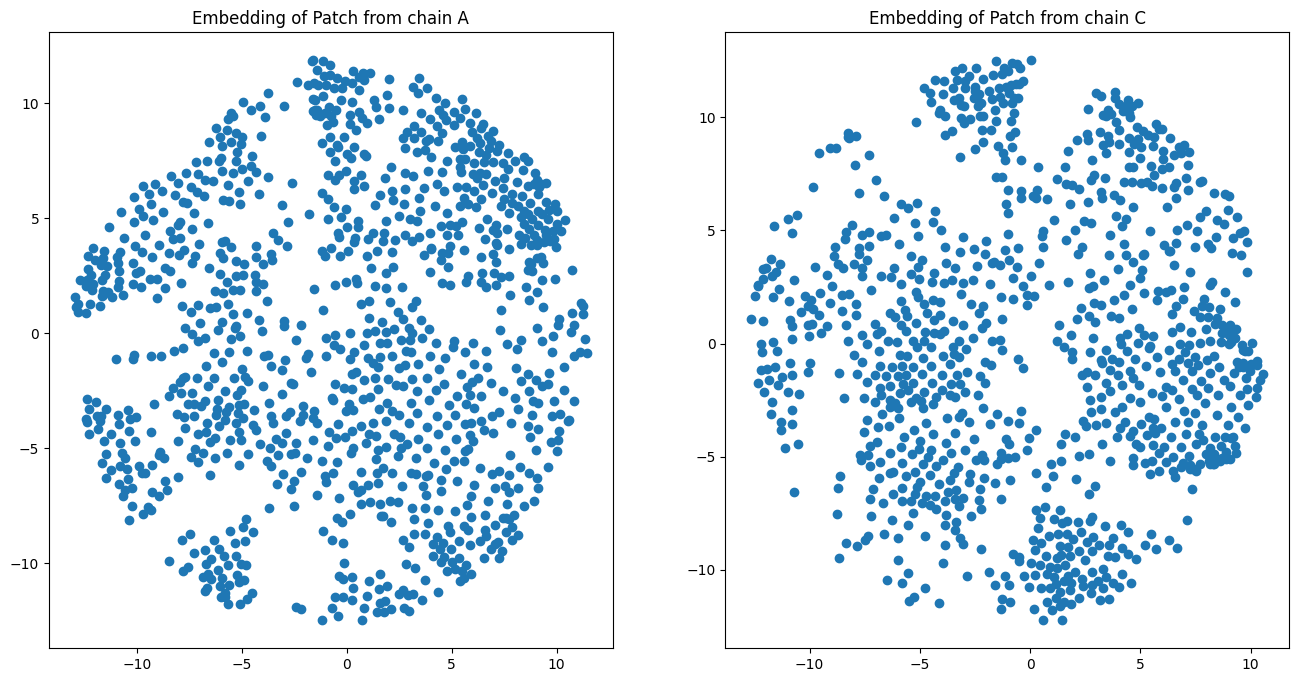

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

plt.subplot(1,2,1)
plt.scatter(embedding_A[:,0], embedding_A[:,1])
plt.title("Embedding of Patch from chain A")

plt.subplot(1,2,2)

plt.scatter(embedding_C[:,0], embedding_C[:,1])
plt.title("Embedding of Patch from chain C")

### Visualize the patch within the points of first_sel

In [16]:
colors_A_test = np.zeros_like(coords_A[patch_A["first_sel"]])
colors_A_test[:] = blue
to_make_red = patch_A["indeces"]
for ind, member in enumerate(patch_A["first_sel"]):
    if member in to_make_red:
        colors_A_test[ind]=red

#visualize_pointcloud(coords_A[patch_A["first_sel"]], colors = colors_A_test)


In [17]:
colors_A_test = np.zeros_like(coords_A[patch_A["second_sel"]])
colors_A_test[:] = blue
to_make_red = patch_A["indeces"]
for ind, member in enumerate(patch_A["second_sel"]):
    if member in to_make_red:
        colors_A_test[ind]=red

#visualize_pointcloud(coords_A[patch_A["second_sel"]], colors = colors_A_test)


### Visualize the patch within the points of second_sel

In [18]:
colors_C_test = np.zeros_like(coords_C[patch_C["first_sel"]])
colors_C_test[:] = blue
to_make_red = patch_C["indeces"]
for ind, member in enumerate(patch_C["first_sel"]):
    if member in to_make_red:
        colors_C_test[ind]=red

#visualize_pointcloud(coords_C[patch_C["first_sel"]], colors = colors_C_test)


In [19]:
colors_C_test = np.zeros_like(coords_C[patch_C["second_sel"]])
colors_C_test[:] = blue
to_make_red = patch_C["indeces"]
for ind, member in enumerate(patch_C["second_sel"]):
    if member in to_make_red:
        colors_C_test[ind]=red

#visualize_pointcloud(coords_C[patch_C["second_sel"]], colors = colors_C_test)


### Save the features of the two patches in arrays

In [20]:
features_patch_A = patch_A["features"]
features_patch_C = patch_C["features"]

Text(0.5, 1.0, 'Embedding of Patch from chain C')

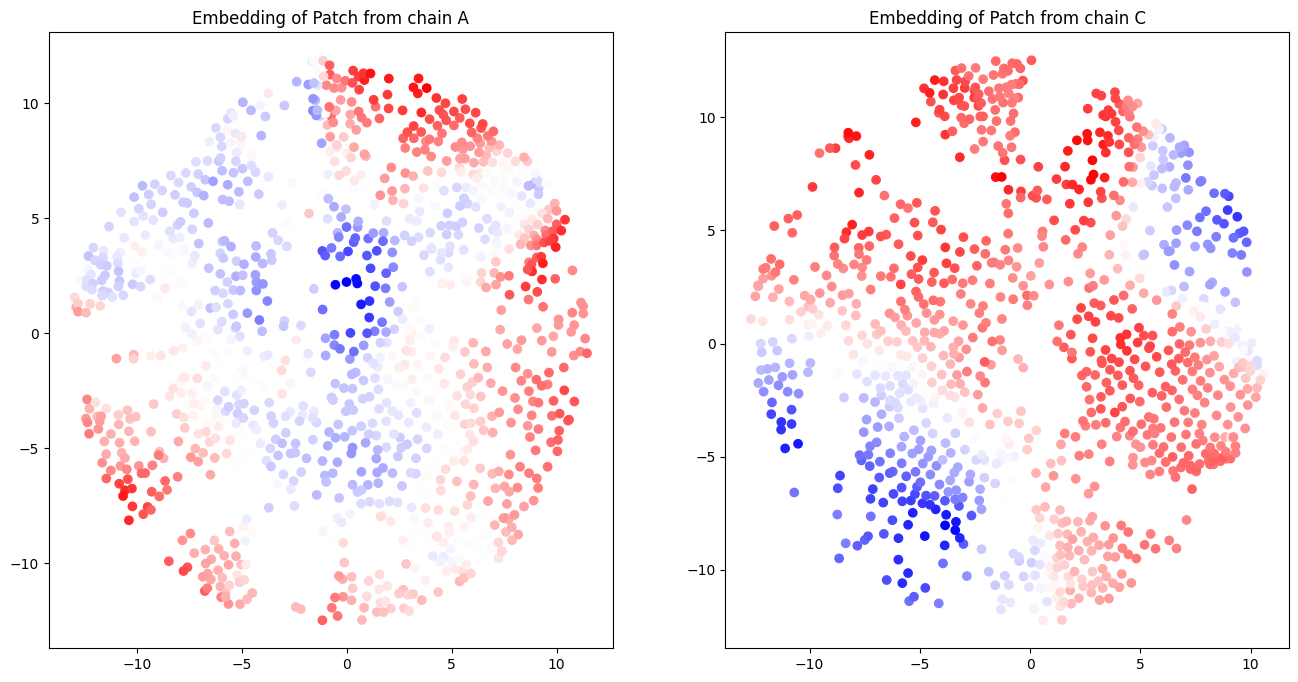

In [21]:
feature = 15

fig, ax = plt.subplots(2, 2, figsize=(16,8))

plt.subplot(1,2,1)
plt.scatter(embedding_A[:,0], embedding_A[:,1], c = features_patch_A[:,feature], cmap = "bwr")
plt.title("Embedding of Patch from chain A")

plt.subplot(1,2,2)
plt.scatter(embedding_C[:,0], embedding_C[:,1], c = features_patch_C[:,feature], cmap = "bwr")
plt.title("Embedding of Patch from chain C")


In [22]:
polar_coords_A = cart_to_polar(embedding_A)
polar_coords_C = cart_to_polar(embedding_C)

Text(0.5, 1.0, 'Embedding of Patch from chain C in polar coordinates')

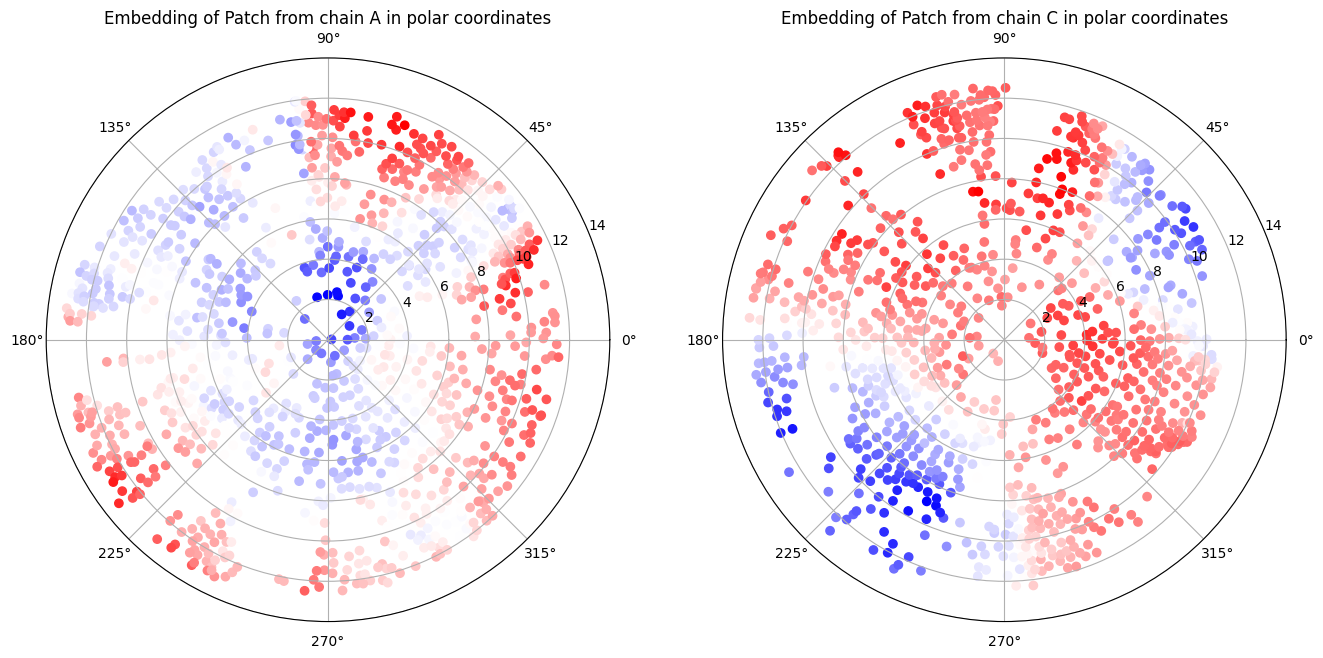

In [23]:
max_rho = 12

fig = plt.figure(figsize=(16,8))
A = fig.add_subplot(121, projection='polar')
plot1 = A.scatter(polar_coords_A[:,1], polar_coords_A[:,0], c = features_patch_A[:,feature], cmap = "bwr")
A.set_ylim([0, max_rho+2])
plt.title("Embedding of Patch from chain A in polar coordinates")

C= fig.add_subplot(122, projection='polar')
plot2 = C.scatter(polar_coords_C[:,1], polar_coords_C[:,0], c = features_patch_C[:,feature], cmap = "bwr")
C.set_ylim([0, max_rho+2])
plt.title("Embedding of Patch from chain C in polar coordinates")

In [24]:
# Center the alignment around the mean? Cut off points?

### Translate the Embedding into radial and angular bins to create array of fixed dimension

In [25]:
# Set the number of radial and angular bins and how many of its nearest neighbors should be taken into 
# account for the calculation of each bins feature vector

max_rho = 12

n_angular_bins = 72
n_radial_bins = 10
n_neighbors = 3

# Create a feature vector (length 16) for each of the bins and save them in a np.array of shape (angular bins x radial bins x features)
tensor_A = create_ang_rad_bins(n_angular_bins, n_radial_bins, max_rho, features_patch_A, embedding_A, n_neighbors) # polar_coords_A, 
tensor_C = create_ang_rad_bins(n_angular_bins, n_radial_bins, max_rho, features_patch_C, embedding_C, n_neighbors) # polar_coords_C

C:\Users\david\AppData\Local\Temp\ipykernel_8320\1923501319.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax1.pcolormesh(angular_A, radial_A, col_A, cmap = "bwr")
C:\Users\david\AppData\Local\Temp\ipykernel_8320\1923501319.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax2.pcolormesh(angular_C, radial_C, col_C, cmap = "bwr")


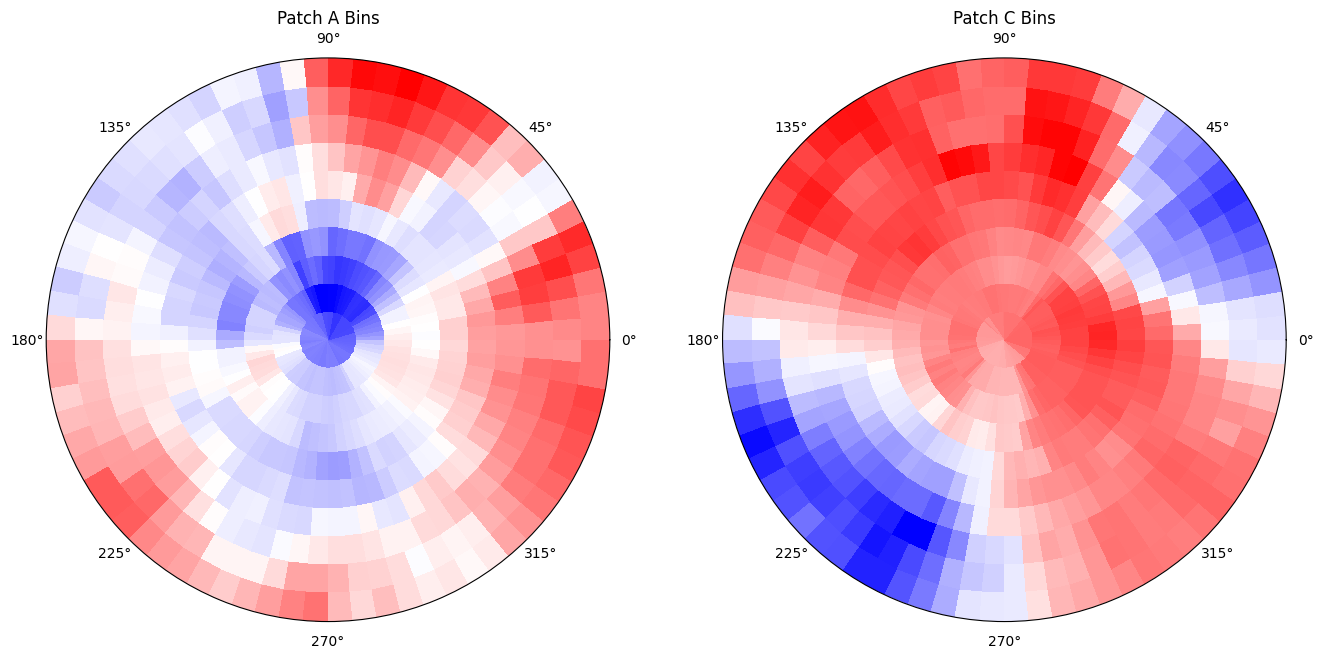

In [26]:
# Create meshgrid for plotting the two patches in bins
max_rho_A = 12# np.max(polar_coords_A[:,0]) # Determine the highest radial coordinate of any point in the patch
angular_A, radial_A = np.mgrid[-np.pi:np.pi:complex(n_angular_bins+1), 0:max_rho_A:complex(n_radial_bins+1)]

max_rho_C = 12 #np.max(polar_coords_C[:,0]) # Determine the highest radial coordinate of any point in the patch
angular_C, radial_C = np.mgrid[-np.pi:np.pi:complex(n_angular_bins+1), 0:max_rho_C:complex(n_radial_bins+1)]

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw=dict(projection='polar'), figsize=(16,8))

# Patch_A
col_A = tensor_A[:,:, feature] # Select the values of the feature chosen to display as color
ax1.pcolormesh(angular_A, radial_A, col_A, cmap = "bwr")
ax1.set_title('Patch A Bins')
ax1.set_ylim([0, max_rho_A])
ax1.set_yticklabels([])

# Patch_C
col_C = tensor_C[:,:, feature] # Select the values of the feature chosen to display
ax2.pcolormesh(angular_C, radial_C, col_C, cmap = "bwr")
ax2.set_title('Patch C Bins')
ax2.set_ylim([0, max_rho_C])
ax2.set_yticklabels([])

plt.show()

### Compare the two patches in all possible orientations

In [27]:
best_score, best_rotation, best_tensor2, best_dot_matrix = compare_patches(tensor_A, tensor_C, max_rho)

Initial score: 2086
Rotation: 1, Score: 2087.353616875641
Rotation: 2, Score: 2088.1866757182806
Rotation: 3, Score: 2089.023296776336
Rotation: 4, Score: 2089.754620412667
Rotation: 5, Score: 2089.991492839258
Rotation: 6, Score: 2089.2533638484215
Rotation: 7, Score: 2088.1414547922477
Rotation: 8, Score: 2088.1655105602485
Rotation: 9, Score: 2089.730362756152
Rotation: 10, Score: 2092.662819785774
Rotation: 11, Score: 2095.6986390408288
Rotation: 12, Score: 2097.6396860019413
Rotation: 13, Score: 2098.0094000221334
Rotation: 14, Score: 2097.011667896034
Rotation: 15, Score: 2095.1050973296906
Rotation: 16, Score: 2093.596926009683
Rotation: 17, Score: 2093.7875254111623
Rotation: 18, Score: 2095.23501398559
Rotation: 19, Score: 2096.9750717475445
Rotation: 20, Score: 2097.926735707417
Rotation: 21, Score: 2097.483551128659
Rotation: 22, Score: 2096.1737187820445
Rotation: 23, Score: 2094.885760836987
Rotation: 24, Score: 2094.3922406672036
Rotation: 25, Score: 2094.3029392575627
Ro

In [28]:
'''
chain_C_patch_6820.npy     Best Score: 2116 after 55 rotations

chain_C_patch_6509.npy     Best Score: 2085 after 28 rotations
chain_C_patch_5237.npy     Best Score: 2155 after 32 rotations
chain_C_patch_1888.npy     Best Score: 2114 after 7 rotations
chain_C_patch_1291.npy     Best Score: 1996 after 60 rotations
chain_C_patch_3200.npy     Best Score: 1871 after 14 rotations
chain_C_patch_446.npy      Best Score: 2206 after 66 rotations
'''


'\nchain_C_patch_6820.npy     Best Score: 2116 after 55 rotations\n\nchain_C_patch_6509.npy     Best Score: 2085 after 28 rotations\nchain_C_patch_5237.npy     Best Score: 2155 after 32 rotations\nchain_C_patch_1888.npy     Best Score: 2114 after 7 rotations\nchain_C_patch_1291.npy     Best Score: 1996 after 60 rotations\nchain_C_patch_3200.npy     Best Score: 1871 after 14 rotations\nchain_C_patch_446.npy      Best Score: 2206 after 66 rotations\n'

C:\Users\david\AppData\Local\Temp\ipykernel_8320\1073068791.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(angular_A, radial_A, col_A, cmap = "bwr")
C:\Users\david\AppData\Local\Temp\ipykernel_8320\1073068791.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(angular_C, radial_C, col_Cr, cmap = "bwr")
C:\Users\david\AppData\Local\Temp\ipykernel_8320\1073068791.py:34: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(angular_C, radial_C, col_C, cmap = "bwr")


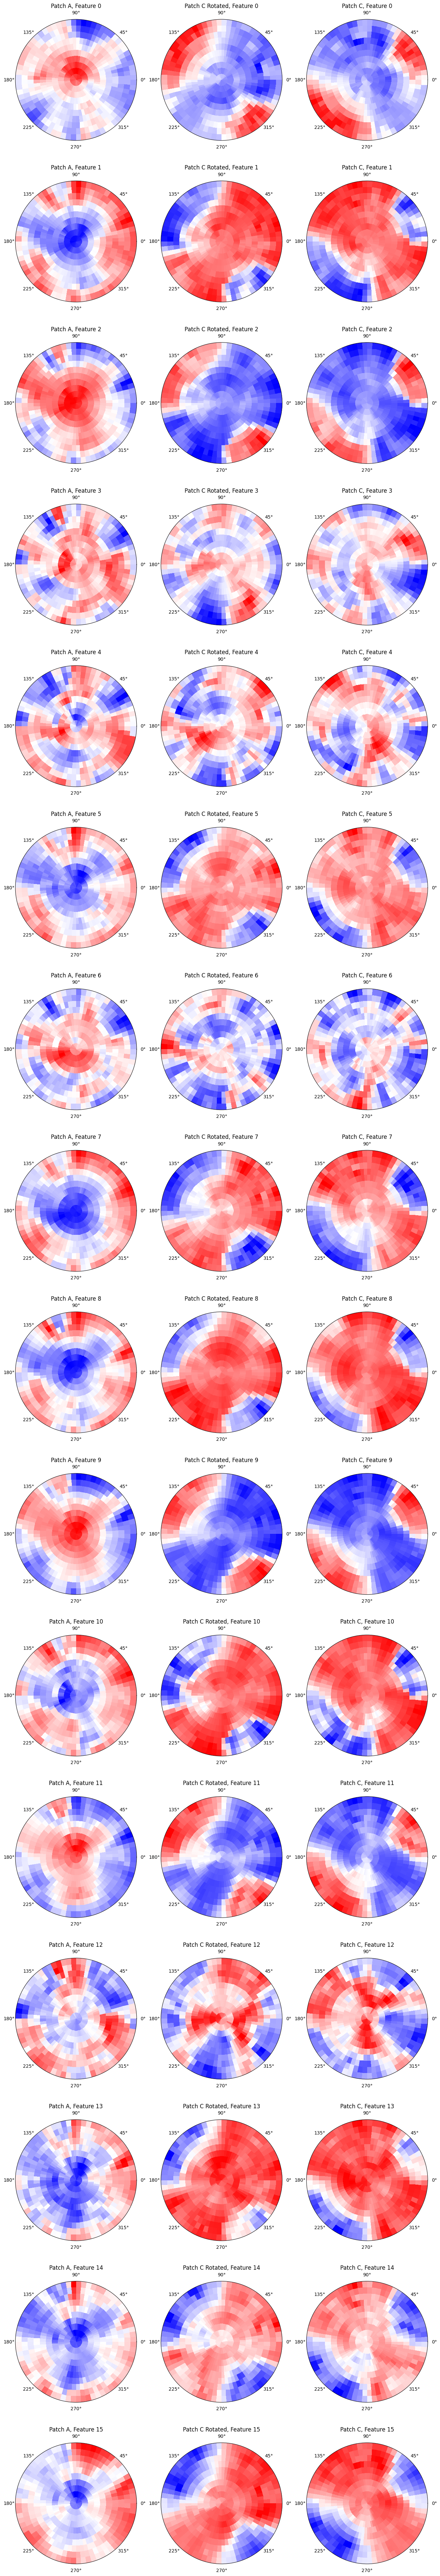

In [29]:
#  Plot

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12),
      (ax13, ax14, ax15), (ax16, ax17, ax18), (ax19, ax20, ax21), (ax22, ax23, ax24),
      (ax25, ax26, ax27), (ax28, ax29, ax30), (ax31, ax32, ax33), (ax34, ax35, ax36),
      (ax37, ax38, ax39), (ax40, ax41, ax42), (ax43, ax44, ax45), (ax46, ax47, ax48)) = plt.subplots(nrows=16, ncols=3 ,subplot_kw=dict(projection='polar'), figsize=(16,100))


for feature, i in enumerate([(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12),
      (ax13, ax14, ax15), (ax16, ax17, ax18), (ax19, ax20, ax21), (ax22, ax23, ax24),
      (ax25, ax26, ax27), (ax28, ax29, ax30), (ax31, ax32, ax33), (ax34, ax35, ax36),
      (ax37, ax38, ax39), (ax40, ax41, ax42), (ax43, ax44, ax45), (ax46, ax47, ax48)]):
      
      ax = i[0] 

      # Patch A unrotated
      col_A = tensor_A[:,:, feature] # Select the values of the feature chosen to display as color
      ax.pcolormesh(angular_A, radial_A, col_A, cmap = "bwr")
      ax.set_title('Patch A, Feature '+str(feature))
      ax.set_ylim([0, max_rho_A])
      ax.set_yticklabels([])

      ax=i[1]
      # Patch C unrotated
      col_Cr = best_tensor2[:,:, feature] # Select the values of the feature chosen to display
      ax.pcolormesh(angular_C, radial_C, col_Cr, cmap = "bwr")
      ax.set_title('Patch C Rotated, Feature '+str(feature))
      ax.set_ylim([0, max_rho_C])
      ax.set_yticklabels([])

      ax=i[2]
      # Patch C rotated
      col_C = tensor_C[:,:, feature] # Select the values of the feature chosen to display
      ax.pcolormesh(angular_C, radial_C, col_C, cmap = "bwr")
      ax.set_title('Patch C, Feature '+str(feature))
      ax.set_ylim([0, max_rho_C])
      ax.set_yticklabels([])

plt.show()
